In [83]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow.keras as keras

%matplotlib inline

# 初めてのニューラルネットワーク

## サンプルデータを用意 (MNIST)

In [69]:
(train_images, train_labels), (test_images, test_labels) = keras.datasets.mnist.load_data()

print(train_images.shape)
print(train_labels.shape)
train_labels[:10]

(60000, 28, 28)
(60000,)


array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

## 全結合2層NN を定義
層(layer)がデータ処理を行う。  
層からは表現(representation)が抽出され、これを重ねる事でデータ蒸留(data distillation)が実装される。
定義は以下からなる。モデル定義は層を積み、コンパイルで損失関数、オプティマイザなどを指定する事で行う。

* 層: 全結合(Dense)2層NN
* 活性化関数: 活性化関数にはrelu, softmaxを使用
* 損失関数: 交差エントロピーの一種を使用
* オプティマイザ: RMSProp
* 評価指標: 正解率を使用

In [70]:
mod = keras.models.Sequential()
mod.add(keras.layers.Dense(512, "relu", input_shape=(28 * 28,)))
mod.add(keras.layers.Dense(10, "softmax"))
mod.compile("rmsprop", "categorical_crossentropy", ["accuracy"])

入力データを作成。一般に0～1の浮動小数点にする。

In [71]:
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
mms = MinMaxScaler()

train_data = train_images.reshape(-1, 28 * 28)
train_data = train_data.astype(np.float32)
train_data = mms.fit_transform(train_data)

test_data = test_images.reshape(-1, 28 * 28)
test_data = test_data.astype(np.float32)
test_data = mms.transform(test_data)

教師データはクラス分類問題では1 of K符号化(OneHotエンコード)して使う。

In [65]:
train_y = keras.utils.to_categorical(train_labels)
test_y = keras.utils.to_categorical(test_labels)

In [76]:
ohe = OneHotEncoder(categories="auto")
train_y = ohe.fit_transform(train_labels.reshape(-1, 1))
test_y = ohe.transform(test_labels.reshape(-1, 1))

訓練を行う

In [89]:
print("訓練")
res = mod.fit(train_data, train_y, epochs=5, batch_size=128, validation_data=(test_data, test_y))
test_loss, test_acc = mod.evaluate(test_data, test_y)

print("評価")
print(test_loss, test_acc)

訓練
Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 2s 28us/sample - loss: 0.0026 - acc: 0.9992 - val_loss: 0.0905 - val_acc: 0.9817
Epoch 2/5
60000/60000 [==============================] - 2s 28us/sample - loss: 0.0023 - acc: 0.9994 - val_loss: 0.0957 - val_acc: 0.9810
Epoch 3/5
60000/60000 [==============================] - 2s 28us/sample - loss: 0.0019 - acc: 0.9996 - val_loss: 0.0898 - val_acc: 0.9829
Epoch 4/5
60000/60000 [==============================] - 2s 28us/sample - loss: 0.0016 - acc: 0.9996 - val_loss: 0.0935 - val_acc: 0.9821
Epoch 5/5
10000/10000 [==============================] - 0s 42us/sample - loss: 0.0997 - acc: 0.9820
評価
0.09969505042314743 0.982


損失関数の減少を確認できる。

In [90]:
res.history

{'loss': [0.0026431887440849094,
  0.002265103603284418,
  0.001918518681038404,
  0.0015562141937591756,
  0.0012619193102252515],
 'acc': [0.9992333, 0.99938333, 0.9995667, 0.9996167, 0.99965],
 'val_loss': [0.09051122230030596,
  0.09566159209730103,
  0.0897760061882439,
  0.09347652014617343,
  0.09969505120813847],
 'val_acc': [0.9817, 0.981, 0.9829, 0.9821, 0.982]}

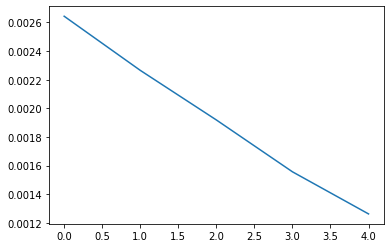

In [98]:
res.history
plt.plot(res.history["loss"])
# plt.plot(res.history["val_loss"])

# 機械学習のデータ表現

## テンソルの導入
多くの機械学習では入力にテンソルを使う。軸の数はnumpyではndimに格納されている。軸は **階数(rank)** とも呼ばれる

In [116]:
print("1階のテンソル(ベクトル)")
print("2次元ベクトルと呼ばれる")
np.arange(2)

1階のテンソル(ベクトル)
2次元ベクトルと呼ばれる


array([0, 1])

In [118]:
print("2階のテンソル(行列)")
print("2次元テンソルと呼ばれることもあり、ベクトルの次元との混同に注意")
np.arange(6).reshape(2, 3)

2階のテンソル(行列)
2次元テンソルと呼ばれることもあり、ベクトルの次元との混同に注意


array([[0, 1, 2],
       [3, 4, 5]])

## テンソルの操作
テンソルの特定の要素を選択する事を **テンソル分解** (tensor slicing)と呼ぶ。以下はMNISTのデータからサンプル軸を1つ切り出して表示している。

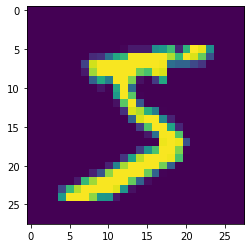

In [120]:
plt.imshow(train_images[0])

## テンソルの現実的な例
テンソルは実際のデータでは以下のような形で見ることが多い。一般に深層学習で使われるデータテンソルの最初の軸は **サンプル軸** (sample axis) になる。これは **サンプル次元** (sample dimension)とも呼ばれる。バッチ処理時の単位ともなるため、 **バッチ次元** (batch dimension) とも呼ばれる。画像や動画ではチャネルが高さ幅の後に来るチャネルラスト(Tensorflow)と、チャネルを高さ幅の前に持ってくるチャネルファースト(Theano)の2流派がある。

* ベクトル: (sample, features)
* 時系列データ、シーケンスデータ: (samples, timesteps, features)
* 画像: (samples, height, width, channels)
* 動画: (samples, frames, height, width, channels)

# ニューラルネットワークの構造
学習は以下の要素に基づいて行われる。

* ネットワーク(モデル)として結合される層
* 入力データと対応する目的地
* 学習に使用されるフィードバックを定義する損失関数
* 学習の進め方を決定するオプティマイザ

## 層・モデル
層は仮設空間が定義される場所であり、学習結果は **重み** によって表現される。モデルは複数の層として繋がっており、繋げ方は全結合以外にもある。入力が2階テンソルの場合には **全結合層** がよく用いられ、時系列の3階テンソルではLSTMな **リカレント層** が使われる。画像へは **畳み込み層** を用いることが多い。その他のバリエーションとして以下のものもある。

* 2分岐ネットワーク
* マルチヘッドネットワーク
* インセプションブロック

## 損失関数とオプティマイザ
定番は以下のようにする。

* 2値分類問題: 交差エントロピー
* 他クラス分類問題: 他クラス交差エントロピー
* 回帰問題: 平均二条誤差(MSE)
* 系列学習問題: CTC(Connectionist Temporal Classification)

# ニューラルネットワークの動作原理

## テンソル演算 (ネットワーク)
入力データを回転や拡大縮小を通し有益な表現へ変換(幾何学演算)することはテンソル演算で表現できる。ニューラルネットワークは層ごとに以下の計算式が定義され、複数層によるテンソル演算を通して表現を有益なものへ変換する。

$$
\begin{align}
    \boldsymbol{Y} = \varphi(\boldsymbol{X} \boldsymbol{W})
\end{align}
$$

## 誤差の計算 (損失関数)
**重み** (weight)の学習は **訓練ループ** (training loop) の中で行われる。学習はフィードバックとして損失関数(E)の **勾配** を計算し、逆向きに重みを更新することで行う。モデルは微分可能な式で作られており、複数層をまたいだ微分は **連鎖率** によって求めることが可能。この原理を利用した **バックプロパゲーション** (誤差逆伝播法、リバースモード微分(reverse-mode differentiation)) アルゴリズムが学習には用いられる。現代のライブラリでは自動的に求められるものが多い (**数式微分**)

$$
\begin{align}
    E = Y - Y^{\prime}
\end{align}
$$

* 訓練データと対応する目的地をバッチデータとして抽出
* モデルを実行し予測値を取得 (**フォワードパス**)
* 損失値を計算
* 損失値が小さくなるよう重みを更新

## 重みの更新 (オプティマイザ)
求めた勾配から重み更新を行う際のアルゴリズムには幾つかある。**オプティマイザ** と呼ばれ、SGD、AdaGrad、RMSPropなどがある。これらはモデル誤差に複数の極小値がある場合に大域的な極小値ではない場所に収束しないようにするなど幾つかの工夫に違いがある。